## Задание 2

В «Минсктранс» поступила жалоба от пассажиров на плохую работу транспорта на диспетчерской станции «Дружная» в период с 20:00 до 21:00. Суть жалобы состоит в том, что троллейбусы ходят не по расписанию и их приходится ждать очень долго на остановках. На предприятии «Минсктранс» существует система регистрации времени прибытия троллейбусов, а также подсчета количества пассажиров. Данные с системы регистрации 	приведены в файле «Данные для статобработки.xlsx» на вкладке «Статистика по троллейбусам». Руководство предприятия поручило вам разобраться в ситуации и выяснить, чем же вызвана жалоба, а также провести развернутый анализ времени движения транспорта и пассажиропотока.
Требуется:
- найти причину жалобы;
- выяснить характеристики, которыми характеризуется движение транспорта и пассажиропоток (числовые, графические, как по отдельным маршрутам троллейбусов, так и в совокупности);
- предоставить развернутую характеристику полученных результатов.


In [362]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime

In [363]:
trolley = pd.read_excel('Данные для статобработки.xlsx', sheet_name = 'Статистика по троллейбусам')
trolley.head(10)

,Номер троллейбуса,Время прибытия,Количество человек
0,31,20:00:00,24
1,51,20:00:00,20
2,27,20:01:00,20
3,31,20:03:00,23
4,27,20:05:00,15
5,51,20:07:00,19
6,31,20:08:00,21
7,27,20:10:00,16
8,31,20:12:00,17
9,51,20:14:00,18


Создадим отдельные таблицы для каждого из маршрутов.

In [364]:
trolley_27 = trolley[trolley['Номер троллейбуса']==27].reset_index(drop = True)
trolley_31 = trolley[trolley['Номер троллейбуса']==31].reset_index(drop = True)
trolley_51 = trolley[trolley['Номер троллейбуса']==51].reset_index(drop = True)

Для того, чтобы сделать выводы насчёт регулярности движения троллейбусов и выявить причины жалоб, необходимо просчитать интервалы движения троллейбусов по каждому из маршрутов.

In [365]:
trolley_31['Интервал'] = 0
trolley_31['Интервал, мин'] = 0

for i in range(len(trolley_31)-1):
    trolley_31['Интервал'].iloc[i+1] = \
    datetime.strptime(str(trolley_31['Время прибытия'].iloc[i+1]), "%H:%M:%S")- \
    datetime.strptime(str(trolley_31['Время прибытия'].iloc[i]), "%H:%M:%S")
    trolley_31['Интервал, мин'].iloc[i+1] = trolley_31['Интервал'].iloc[i+1].total_seconds()/60
    
trolley_27['Интервал'] = 0
trolley_27['Интервал, мин'] = 0
for i in range(len(trolley_27)-1):
    trolley_27['Интервал'].iloc[i+1] = \
    datetime.strptime(str(trolley_27['Время прибытия'].iloc[i+1]), "%H:%M:%S")-\
    datetime.strptime(str(trolley_27['Время прибытия'].iloc[i]), "%H:%M:%S")
    trolley_27['Интервал, мин'].iloc[i+1] = trolley_27['Интервал'].iloc[i+1].total_seconds()/60
    
trolley_51['Интервал'] = 0
trolley_51['Интервал, мин'] = 0
for i in range(len(trolley_51)-1):
    trolley_51['Интервал'].iloc[i+1] = \
    datetime.strptime(str(trolley_51['Время прибытия'].iloc[i+1]), "%H:%M:%S")-\
    datetime.strptime(str(trolley_51['Время прибытия'].iloc[i]), "%H:%M:%S")
    trolley_51['Интервал, мин'].iloc[i+1] = trolley_51['Интервал'].iloc[i+1].total_seconds()/60

trolleys_df = pd.concat([trolley_27, trolley_31, trolley_51])

/Users/lizazhyhar/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Получив интервалы движения троллейбусов на ДС "Дружная", сгруппируем их и агрегируем, чтобы узнать:
- среднее значение интервала;
- стандартное отклонение от среднего;
- максимальный и минимальный интервал движения;
- среднее и суммарное количество пассажиров.  

Также, нас интересуют значения этих показателей не только по каждому маршруту в отдельности, но и по всем маршрутам в целом.

In [366]:
index_titles = ['Среднее значение интервала, минут', "Стандартное отклонение от среднего, минут", \
                "Максимальный интервал, минут", "Минимальный интервал, минут", \
                "Среднее количество пассажиров", "Всего пассажиров"]
results = pd.DataFrame(index = index_titles)

trolleys_list = [trolley_27, trolley_31, trolley_51, trolleys_df]

for tr in range(len(trolleys_list)):
    mean = round(trolleys_list[tr]['Интервал, мин'].loc[(trolleys_list[tr]['Интервал, мин']!=0)].mean(), 2)
    std = round(trolleys_list[tr]['Интервал, мин'].loc[(trolleys_list[tr]['Интервал, мин']!=0)].std(), 2)
    max_int = trolleys_list[tr]['Интервал, мин'].loc[(trolleys_list[tr]['Интервал, мин']!=0)].max()
    min_int = trolleys_list[tr]['Интервал, мин'].loc[(trolleys_list[tr]['Интервал, мин']!=0)].min()
    people = round(trolleys_list[tr]['Количество человек'].mean(), 0)
    total_people = round(trolleys_list[tr]['Количество человек'].sum(), 0)
    results[tr] = [mean, std, max_int, min_int, people, total_people]

results.columns = ['27', '31', '51', 'Все маршруты']
results

,27,31,51,Все маршруты
"Среднее значение интервала, минут",4.92,4.00,7.00,5.00
"Стандартное отклонение от среднего, минут",0.79,0.93,2.27,1.73
"Максимальный интервал, минут",6.00,5.00,11.00,11.00
"Минимальный интервал, минут",4.00,3.00,3.00,3.00
Среднее количество пассажиров,10.00,14.00,15.00,13.00
Всего пассажиров,130.00,224.00,135.00,489.00


Из таблицы выше можно сделать следующие выводы:  

1 Средний интервал движения по всем маршрутам составляет 5 минут. Трудно представить ситуацию, когда каждый троллейбус приходит на станцию ровно через 5 минут в силу различных внешних факторов (пробки, загруженность, плохие погодные условия). Поэтому интервал движения троллейбусов может отклониться от 5 минут. В нашем случае такое отклонение составляет 1.73 минут в большую или меньшую сторону. Простыми словами, время ожидания пассажирами троллейбуса на ДС "Дружная", в среднем составляет от 3.2 до 6.7 минут. Чем больше этот диапазон, тем хуже. При этом, хуже не только для пассажиров, но и для "Минсктранса". В следствии нерегулярности транспорта и долгого ожидания будет приходить всё больше жалоб.  

2 Если рассматривать движение троллейбусов в отдельности, то особое внимание следует обратить на №51. Средний интервал движения этого троллейбуса значительно, на целых 2 минуты, выше общего среднего значения. С отклонением от среднего интервала та же ситуация. Время ожидания пассажирами №51 в среднем варьируется от 4.7 до 9.2 минут, что гораздо превосходит диапазон ожидания пассажирами других троллейбусов. Например, у №31 этот диапазон составляет 3.1-4.9 минут. №27 можно назвать самым "стабильным" троллейбусом. Хоть и средний интервал движения у него больше №31 почти на минуту, отклонение от среднего интервала у него меньше. Это значит, что пассажиры могут полагаться на регулярность движения №27.

3 Самым загруженным троллейбусом в промежутке с 8 до 9 вечера является №31 - 224 пассажира за час. Однако, среднее количество пассажиров за один рейс больше у №51, хотя общее количество пассажиров за рассматриваемый период - всего 135. Это можно объяснить тем, что средний интервал движения №51 почти в 2 раза больше, чем у №31. За счёт большего интервала движения №51 выполняет меньше рейсов. За отведённый промежуток времени, он совершил практически в 2 и 1.5 раза меньше рейсов, чем №31 и №27 соответственно. Стоит обратить внимание на загруженность №27. Он хоть и ходит в 1.5 раза чаще, чем №51, однако среднее количество пассажиров и общая загруженность за час у него меньше. Возможно, это маловостребованный маршрут или пассажиры не довольны самим транспортом. 

Далее мы визуализируем интервалы движения маршрутов и количество пассажиров, чтобы наглядно показать ситуацию с троллейбусами и выявить причину жалоб.

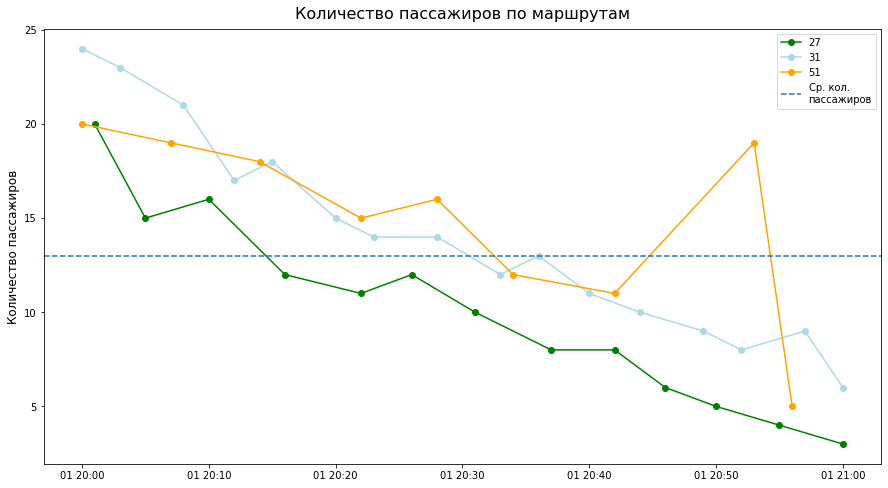

In [367]:
trolley_27['Время прибытия'] = pd.to_datetime(trolley_27['Время прибытия'], format = '%H:%M:%S')
trolley_31['Время прибытия'] = pd.to_datetime(trolley_31['Время прибытия'], format = '%H:%M:%S')
trolley_51['Время прибытия'] = pd.to_datetime(trolley_51['Время прибытия'], format = '%H:%M:%S')

fig, ax = plt.subplots(figsize = (15, 8))

plt.plot(trolley_27['Время прибытия'], trolley_27['Количество человек'], \
         marker='o', color = 'green', label = '27')
plt.plot(trolley_31['Время прибытия'], trolley_31['Количество человек'], \
         marker='o', color = 'lightblue', label = '31')
plt.plot(trolley_51['Время прибытия'],  trolley_51['Количество человек'], \
         marker='o', color = 'orange', label = '51')
plt.title('Количество пассажиров по маршрутам', fontsize = 16, pad = 10)
plt.ylabel('Количество пассажиров', fontsize = 12)
plt.axhline(results['Все маршруты']['Среднее количество пассажиров'], linestyle = '--', label = 'Ср. кол. \nпассажиров')
plt.legend()
plt.show()

Из графика количества пассажиров по маршрутам видно, что в промежутке с 8 до 9 вечера на ДС "Дружная" загруженность пассажирами постепенно снижается. Загруженность №27 и №31 снижается быстрее, чем у №51. 

В 20:53 можно наблюдать значительный скачок количества ожидающих троллейбуса пассажиров на маршруте №51. Если посмотреть на интервал движения треллейбуса №51 в это время (график ниже), то можно заметить выброс. Это увеличение может быть обусловлено различными сопутствующими факторами. Например, на ДС приходит пригородный автобус или электричка. Это объясняет естественное увеличение ожидающих пассажиров.

Можно заметить, что вместе с ростом ожидающих пассажиров в этот промежуток времени интервал движения троллейбуса №51 составил 11 минут, что больше на 4 минут среднего значения троллейбуса №51. Если посмотреть исходную таблицу, то пик пассажиров приходится именно на эту задержку.

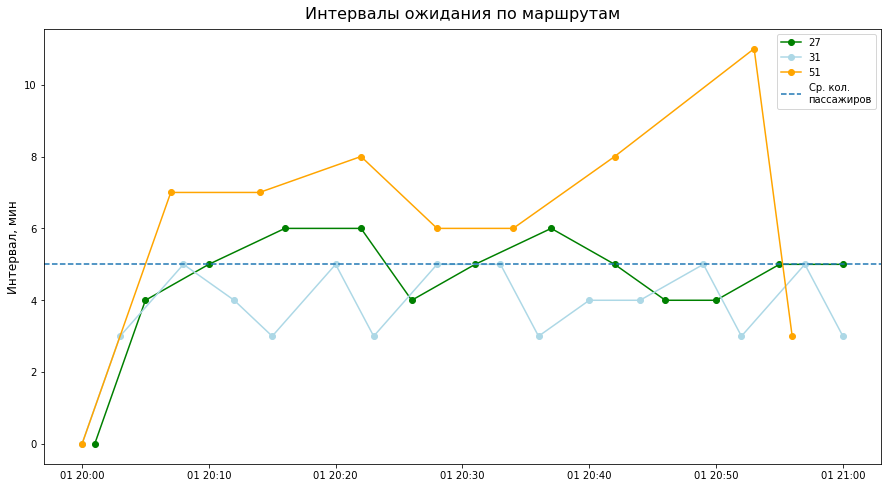

In [368]:
fig, ax = plt.subplots(figsize = (15, 8))

plt.plot(trolley_27['Время прибытия'], trolley_27['Интервал, мин'], \
         marker='o', color = 'green', label = '27')
plt.plot(trolley_31['Время прибытия'], trolley_31['Интервал, мин'], \
         marker='o', color = 'lightblue', label = '31')
plt.plot(trolley_51['Время прибытия'],  trolley_51['Интервал, мин'], \
         marker='o', color = 'orange', label = '51')
plt.title('Интервалы ожидания по маршрутам', fontsize = 16, pad = 10)
plt.ylabel('Интервал, мин', fontsize = 12)
plt.axhline(results['Все маршруты']['Среднее значение интервала, минут'], \
            linestyle = '--', label = 'Ср. кол. \nпассажиров')
plt.legend()
plt.show()

**Вывод**: скорее всего увеличение жалоб от пассажиров на плохую работу транспорта на диспетчерской станции «Дружная» в период с 20:00 до 21:00 связано именно с задержкой троллейбуса №51 в 20:53. В это время на ДС собралось максимальное количество пассажиров и ждать им пришлось 11 минут, вместо 7 минут.

На маршрут №51 стоит обратить особое внимание, так как он ходит реже других троллейбусов, но при этом, среднее количество пассажиров у него выше. Также его движение, за счёт большого значения отклонения от среднего интервала, нельзя назвать регулярным, что повлечёт за собой новые жалобы. Необходимо провести более детальный анализ и изучить возможность влияния внешних факторов на задержку транспорта, чтобы скорректировать его расписание.